In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import model_functions

#acquire train csv from local drive
train = pd.read_csv('Telco_Train_CSV.csv', index_col=0)
validate = pd.read_csv('Telco_Validate_CSV.csv', index_col=0)
test = pd.read_csv('Telco_Test_CSV.csv', index_col=0)


In [2]:
#isolating target variable in train, validate, test sets
X_Train = train.drop(columns = ['churn_Yes', 'customer_id'])
y_Train = train.churn_Yes

X_val = validate.drop(columns = ['churn_Yes', 'customer_id'])
y_val = validate.churn_Yes

X_test = test.drop(columns = ['churn_Yes', 'customer_id'])
y_test = test.churn_Yes

In [3]:
#testing if functions work from import model_functions 
model_functions.best_performing_model(X_Train, y_Train, X_test, y_test)

Best Model: Random Forest
Test Accuracy: 81.05%


- - -
### Decision Tree
- - -

In [4]:
#y_Train[churn_Yes].mean()
#baseline
1 - train.churn_Yes.mean()

0.7347197565305605

In [5]:
seed=35
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [6]:
clf.fit(X_Train, y_Train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [7]:
clf.score(X_Train, y_Train)

0.7874714684250571

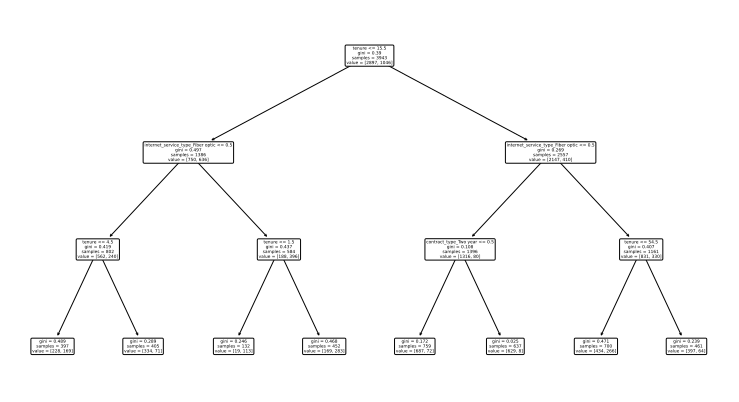

In [8]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_Train.columns, rounded=True)
plt.show()

In [9]:
val_pred = clf.predict(X_val)

In [10]:
val_pred[0:5]

array([1, 0, 0, 0, 1])

In [11]:
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1242
           1       0.69      0.39      0.49       449

    accuracy                           0.79      1691
   macro avg       0.75      0.66      0.68      1691
weighted avg       0.78      0.79      0.77      1691



In [12]:
y_pred_proba = clf.predict_proba(X_Train)
y_pred_proba

array([[0.98744113, 0.01255887],
       [0.98744113, 0.01255887],
       [0.62      , 0.38      ],
       ...,
       [0.62      , 0.38      ],
       [0.82469136, 0.17530864],
       [0.62      , 0.38      ]])

In [13]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_Train, y_Train)))


Accuracy of Decision Tree classifier on training set: 0.79


In [14]:
y_Train.value_counts()


0    2897
1    1046
Name: churn_Yes, dtype: int64

print(classification_report(y_train, y_pred))


In [15]:
# print(classification_report(y_Train, y_pred_proba))

In [16]:
X_validate = validate.drop(columns = ['churn_Yes', 'customer_id'])
y_validate = validate.churn_Yes


In [17]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.79


In [18]:
# Produce y_predictions that come from the X_validate
y_pred_validate = clf.predict(X_validate)
y_pred_validate

array([1, 0, 0, ..., 0, 0, 1])

In [19]:
# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred_validate))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1242
           1       0.69      0.39      0.49       449

    accuracy                           0.79      1691
   macro avg       0.75      0.66      0.68      1691
weighted avg       0.78      0.79      0.77      1691



#### This cell changed to markdown because this was copy pasted to another file and it's erroring out my notebook

#One cell to rule them all



#baseline
    baseline = 1 - train.churn_Yes.mean()
    seed=35
    clf = DecisionTreeClassifier(max_depth=3, random_state=123)
    clf.fit(X_Train, y_Train)
    clf.score(X_Train, y_Train)
    plt.figure(figsize=(13, 7))
    plot_tree(clf, feature_names=X_Train.columns, rounded=True)
    plt.show()
    val_pred = clf.predict(X_val)
    print(classification_report(y_val, val_pred))
    y_pred_proba = clf.predict_proba(X_Train)
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_Train, y_Train)))
    print(classification_report(y_Train, y_pred_proba))
    X_validate = validate.drop(columns = ['churn_Yes', 'customer_id'])
    print('Accuracy of Decision Tree classifier on validate set: {:.2f}'.format(clf.score(X_validate, y_validate)))
    y_pred_validate = clf.predict(X_validate)
    print(classification_report(y_validate, y_pred_validate))
    


- - -
#### Random Forest
- - -

In [20]:
metrics = []

for j in range (1, 10):
    for i in range(2, 10):
        rf = RandomForestClassifier(max_depth=i, min_samples_leaf=j, random_state=123)

        rf = rf.fit(X_Train, y_Train)
        in_sample_accuracy = rf.score(X_Train, y_Train)
        out_of_sample_accuracy = rf.score(X_validate, y_validate)

        output = {
            "min_samples_per_leaf": j,
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy
        }
    
        metrics.append(output)

df1 = pd.DataFrame(metrics)
df1["difference"] = df1.train_accuracy - df1.validate_accuracy
df1.sort_values(by=['validate_accuracy'], ascending=False).head(10)

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
23,3,9,0.846817,0.811354,0.035463
29,4,7,0.818920,0.810171,0.008748
63,8,9,0.828811,0.809580,0.019230
71,9,9,0.826021,0.808989,0.017032
39,5,9,0.837687,0.808989,0.028698
6,1,8,0.837941,0.808989,0.028952
30,4,8,0.827035,0.808397,0.018638
46,6,8,0.824245,0.808397,0.015848
14,2,8,0.830839,0.807806,0.023033
22,3,8,0.828303,0.807806,0.020497


In [21]:
rf = RandomForestClassifier(max_depth=9, min_samples_leaf=3, random_state=123)
rf

RandomForestClassifier(max_depth=9, min_samples_leaf=3, random_state=123)

In [22]:
#use max_depth 9 

- - -
#### KNN
- - -

In [23]:
metrics = []

for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn = knn.fit(X_Train, y_Train)
    in_sample_accuracy = knn.score(X_Train, y_Train)
    out_of_sample_accuracy = knn.score(X_validate, y_validate)

    output = {
        "neighbors": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)

df1 = pd.DataFrame(metrics)
df1["difference"] = df1.train_accuracy - df1.validate_accuracy
df1.sort_values(by=['validate_accuracy'], ascending=False).head(10)

,neighbors,train_accuracy,validate_accuracy,difference
7,9,0.811565,0.781786,0.029779
6,8,0.812579,0.780603,0.031976
4,6,0.816891,0.778829,0.038062
5,7,0.820441,0.778238,0.042204
3,5,0.833376,0.769959,0.063417
2,4,0.831600,0.768776,0.062824
0,2,0.855947,0.762862,0.093085
1,3,0.857469,0.756949,0.100520


In [24]:
#testing if decision tree function is working from model_functions.py
model_functions.decision_tree_results(X_Train, y_Train, X_val, y_val)

Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on validate set: 0.79


In [25]:
model_functions.isolate_target()

NameError: name 'train' is not defined